<a href="https://colab.research.google.com/github/Kaia-nyoung/2025-ML-class/blob/main/4%EC%A3%BC%EC%B0%A8/Wine_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# -----------------------------
# 1) 데이터 준비
# -----------------------------

cols= [
    "label", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash",
    "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols",
    "Proanthocyanins", "Color_intensity", "Hue",
    "OD280/OD315_of_diluted_wines", "Proline"
]

df = pd.read_csv("/content/drive/MyDrive/ML-MK/wine.data", header=None, names=cols).dropna()
df  # print(df) 와 동일

,label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
X = df.drop(columns=["label"])
y = df["label"]


In [14]:
print(X.shape, y.shape)
print(X.head())
print(y.head())

(178, 13) (178,)
   Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315_of_diluted_wines  Proline  
0 

In [16]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [18]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)



In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((142, 13), (36, 13), (142,), (36,))

In [28]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [22]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [23]:
y_test

,label
10,1
134,3
28,1
121,2
62,2
51,1
7,1
66,2
129,2
166,3


In [24]:
#예측값 출력

dt_y_pred

array([1, 2, 1, 2, 2, 1, 1, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3])

In [30]:
from sklearn.metrics import accuracy_score

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("KNN 정확도:", acc_knn)


KNN 정확도: 0.8055555555555556


In [25]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.9444
[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]
=== RF Test Accuracy ===
Random Forest : 1.0000
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9722
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


In [31]:
import pandas as pd

# Logistic Regression 학습
lr = LogisticRegression(max_iter=500, multi_class="multinomial", solver="lbfgs")
lr.fit(X_train, y_train)

# 기울기(coef_)와 절편(intercept_) 출력
print("기울기 (coef_):")
print(lr.coef_)        # (클래스 개수 × 특성 개수) 행렬

print("\n절편 (intercept_):")
print(lr.intercept_)   # (클래스 개수,) 벡터


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


기울기 (coef_):
[[-3.49023561e-01  4.40111539e-01  6.06235796e-01 -3.50748311e-01
  -5.82457524e-03  1.64034638e-01  9.86798592e-01  6.11692975e-02
  -2.02535090e-01  1.50330921e-01 -7.11648099e-03  5.81333991e-01
   8.15196910e-03]
 [ 7.08142024e-01 -8.78806193e-01 -7.26090661e-01  1.25017101e-01
   2.78231116e-03  1.94852223e-01  1.67220913e-01  1.01289386e-02
   8.39478253e-01 -9.09822269e-01  2.57057680e-01 -9.35497182e-02
  -7.72307015e-03]
 [-3.59118463e-01  4.38694655e-01  1.19854865e-01  2.25731210e-01
   3.04226408e-03 -3.58886860e-01 -1.15401951e+00 -7.12982361e-02
  -6.36943163e-01  7.59491348e-01 -2.49941199e-01 -4.87784272e-01
  -4.28898947e-04]]

절편 (intercept_):
[-0.23766375  0.34922369 -0.11155994]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# coef_ → DataFrame으로 변환
coef_df = pd.DataFrame(lr.coef_,
                       columns=X_train.columns,   # 특성 이름
                       index=lr.classes_)        # 클래스 레이블
print("=== 기울기 (coef_) ===")
print(coef_df)

# intercept_ → Series로 변환
intercept_df = pd.Series(lr.intercept_, index=lr.classes_, name="intercept")
print("\n=== 절편 (intercept_) ===")
print(intercept_df)


=== 기울기 (coef_) ===
    Alcohol  Malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
1 -0.349024    0.440112  0.606236          -0.350748  -0.005825   
2  0.708142   -0.878806 -0.726091           0.125017   0.002782   
3 -0.359118    0.438695  0.119855           0.225731   0.003042   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
1       0.164035    0.986799              0.061169        -0.202535   
2       0.194852    0.167221              0.010129         0.839478   
3      -0.358887   -1.154020             -0.071298        -0.636943   

   Color_intensity       Hue  OD280/OD315_of_diluted_wines   Proline  
1         0.150331 -0.007116                      0.581334  0.008152  
2        -0.909822  0.257058                     -0.093550 -0.007723  
3         0.759491 -0.249941                     -0.487784 -0.000429  

=== 절편 (intercept_) ===
1   -0.237664
2    0.349224
3   -0.111560
Name: intercept, dtype: float64


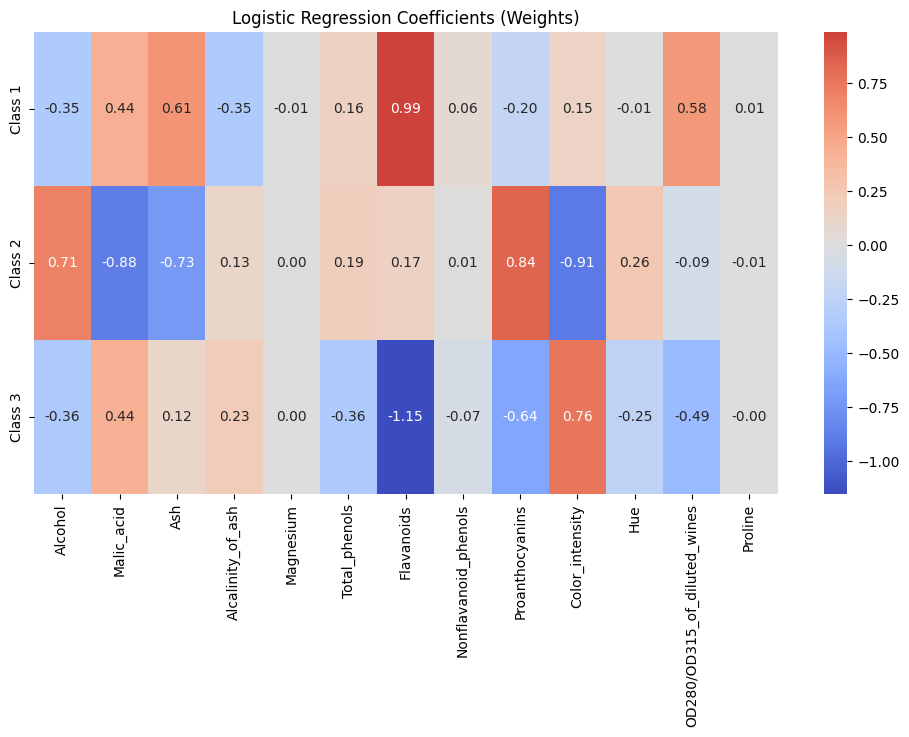

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# coef_ → DataFrame
coef_df = pd.DataFrame(lr.coef_,
                       columns=X_train.columns,
                       index=[f"Class {c}" for c in lr.classes_])

plt.figure(figsize=(12,6))
sns.heatmap(coef_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Logistic Regression Coefficients (Weights)")
plt.show()


/tmp/ipython-input-2535602907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intercept_df.index, y=intercept_df.values, palette="viridis")


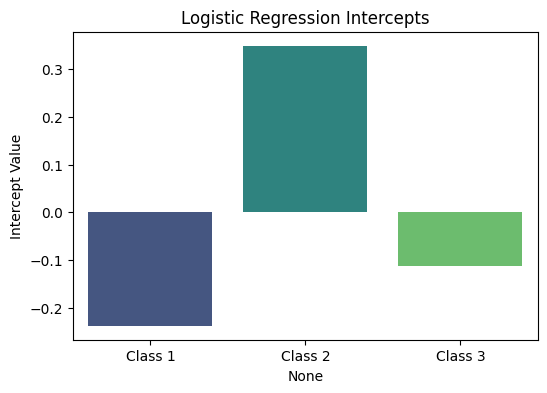

In [34]:
intercept_df = pd.Series(lr.intercept_, index=[f"Class {c}" for c in lr.classes_])

plt.figure(figsize=(6,4))
sns.barplot(x=intercept_df.index, y=intercept_df.values, palette="viridis")
plt.title("Logistic Regression Intercepts")
plt.ylabel("Intercept Value")
plt.show()
